# Milestone 10
## Descorrelación espacial en señales de audio estéreo

Como especifica el [enunciado](https://tecnologias-multimedia.github.io/study_guide/spatial_decorrelation/), usaremos el código del [notebook](https://tecnologias-multimedia.github.io/study_guide/spatial_decorrelation/), añadiéndole mejoras



## - Decorrelacionar:

Fórmula facilitada:

· $w_{0} = x_{0} + x_{1}$

· $w_{1} = x_{0} - x_{1}$



In [43]:
def MST_analyze(x):
    w = np.empty_like(x, dtype=np.int32)
    w[:, 0] = x[:, 0].astype(np.int32) + x[:, 1] # L(ow frequency subband)
    w[:, 1] = x[:, 0].astype(np.int32) - x[:, 1] # H(igh frequency subband)
    return w

### PROBLEMA ![Alert](https://i.imgur.com/n2guntp.png)
Necesitamos enviar los datos por un tipo int32, es decir, el doble de lo que se necesita para que no desborde.

### SOLUCIÓN ![Solution](https://i.imgur.com/byb4mnc.png)
Como queremos mejorar la compresión, vamos a enviar un int16 ¿cómo hacer para que no desborde? Disminuyendo la amplitud de las señales de la siguiente forma:

· $w_{0} = \frac{1}{2}(x_{0} + x_{1})$

· $w_{1} = \frac{1}{2}(x_{0} - x_{1})$

In [45]:
def MST_analyze_Mejorado(x):
    w = np.empty_like(x, dtype=np.int32)
    w[:, 0] = (x[:, 0].astype(np.int32) + x[:, 1])//2 # L(ow frequency subband)
    w[:, 1] = (x[:, 0].astype(np.int32) - x[:, 1])//2 # H(igh frequency subband)
    return w.astype(np.int16) # Lo convertimos a int16

## - Correlacionar
Facilitado por el profesor:

· $w_{0} = \frac{1}{2}(x_{0} + x_{1})$

· $w_{1} = \frac{1}{2}(x_{0} - x_{1})$

In [51]:
def MST_synthesize(w):
    x = np.empty_like(w, dtype=np.int16)
    x[:, 0] = (w[:, 0] + w[:, 1])/2 # L(ow frequency subband)
    x[:, 1] = (w[:, 0] - w[:, 1])/2 # H(igh frequency subband)
    return x

Nuestras fórmulas ![star](https://i.imgur.com/FKwm0ue.png):

· $w_{0} = x_{0} + x_{1}$

· $w_{1} = x_{0} - x_{1}$

In [53]:
def MST_synthesize_Mejorado(w):
    x = np.empty_like(w, dtype=np.int16)
    x[:, 0] = w[:, 0] + w[:, 1] # L(ow frequency subband)
    x[:, 1] = w[:, 0] - w[:, 1] # H(igh frequency subband)
    return x

## Prueba ![test](https://i.imgur.com/djhYERu.png)

In [34]:
import sounddevice as sd
import numpy as np
fs = 44100
duration = 3.0  # seconds
x = sd.rec(int(duration * fs), samplerate=fs, channels=2, dtype=np.int16)
print("Habla!")
while sd.wait():
    pass
print("Hecho")

Habla!
Hecho


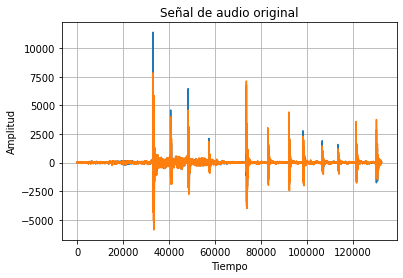

In [48]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import math

def plot(x, *args, xlabel='', ylabel='', title=''):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.grid()
    ax.xaxis.set_label_text(xlabel)
    ax.yaxis.set_label_text(ylabel)
    ax.plot(x, *args)
    plt.show(block=False)

plot(np.linspace(0, len(x)-1, len(x)), x[:,0], x[:,1], xlabel="Tiempo", ylabel="Amplitud", title="Señal de audio original")

## Comparación de las señales ![compare](https://i.imgur.com/LkwsSoI.png): 


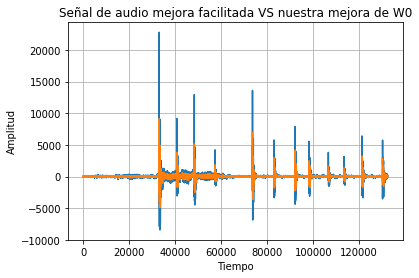

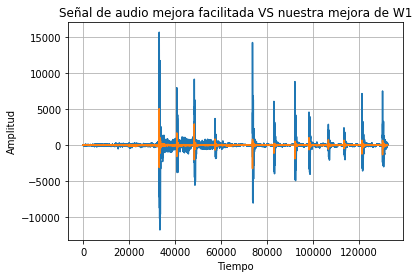

In [74]:
sy = MST_synthesize(y) # Fórmula facilitado
sz = MST_synthesize_Mejorado(x) # Fórmula mejorada

plot(np.linspace(0, len(x)-1, len(x)), sy[:,0], z[:,0], xlabel="Tiempo", ylabel="Amplitud", title="Señal de audio mejora facilitada VS nuestra mejora de W0")
plot(np.linspace(0, len(x)-1, len(x)), sy[:,1], z[:,1], xlabel="Tiempo", ylabel="Amplitud", title="Señal de audio mejora facilitada VS nuestra mejora de W1")

## Reconstruimos la señal ![compare](https://i.imgur.com/LkwsSoI.png)

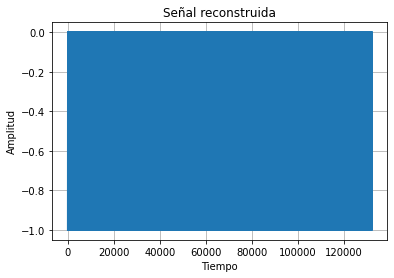

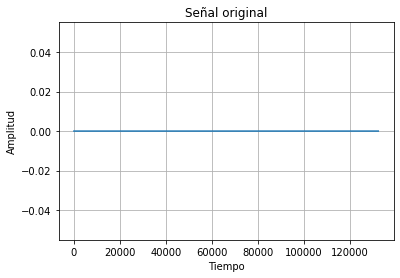

In [80]:
sz = MST_synthesize_Mejorado(z) # Fórmula mejorada

plot(np.linspace(0, len(x)-1, len(x)), sz[:,0]-x[:,0], xlabel="Tiempo", ylabel="Amplitud", title="Error en la señal reconstruida")
plot(np.linspace(0, len(x)-1, len(x)), sz[:,1]-x[:,1], xlabel="Tiempo", ylabel="Amplitud", title="Error en la señal original")

In [82]:
print(f"La amplitud de la señal va desde {np.min(x)} hasta {np.max(x)} y el error es de {np.max(sz[:,0]-x[:,0]) - np.min(sz[:,0]-x[:,0])} de amplitud, esto se debe a la división en analyze(x)")

La amplitud de la señal va desde -5897 hasta 11406 y el error es de 1 de amplitud, esto se debe a la división en analyze(x)


# ¿Qué hemos conseguido con esto?

Evitar la sobrecarga de red ![happy](https://i.imgur.com/yKrGkGA.png)

# RESULTADOS DE COMPRESIÓN
![comparación de la compresión](https://i.imgur.com/4ywP7dE.jpg)